In [1]:
import os
os.getcwd()

'c:\\Users\\ebaca\\Desktop\\Interacting Galaxies Project'

In [33]:
from funcrefs import PhotAnnulus as phan
from funcrefs import custom_colormap as ccm
from funcrefs import fnrefs as rfs

from astropy.io import fits
import numpy as np

from astropy.stats import SigmaClip
import photutils.background as pb

import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
unc_pair = {
    'g': rfs.create_stack('NGC 4567/raw data/', keyword = '_g_'),
    'ha': rfs.create_stack('NGC 4567/raw data/', keyword = '_Ha_'),
    'r': rfs.create_stack('NGC 4567/raw data/', keyword = '_r_'),
    'i': rfs.create_stack('NGC 4567/raw data/', keyword = '_i_')
}

unc_m58 = {
    'g': rfs.create_stack('M 58/raw data/', keyword = '_g_'),
    'ha': rfs.create_stack('M 58/raw data/', keyword = '_Ha_'),
    'r': rfs.create_stack('M 58/raw data/', keyword = '_r_')
}

In [3]:
pair = {
    'g': fits.open('NGC 4567/calibrated_g.fits')[0].data,
    'ha': fits.open('NGC 4567/calibrated_ha.fits')[0].data,
    'r': fits.open('NGC 4567/calibrated_r.fits')[0].data,
    'i': fits.open('NGC 4567/calibrated_i.fits')[0].data
}

pair_sfr = pair['r'] - pair['ha']
pair_bkg = pb.Background2D(pair_sfr, box_size=(100, 100), filter_size=(3, 3), sigma_clip=SigmaClip(sigma=3),
                    mask=(pair_sfr == 0), bkg_estimator=pb.MedianBackground())

pair_sfr = pair_sfr - pair_bkg.background

In [52]:
rflat = unc_pair['r'].flatten()
rflat.shape, type(rflat), max(rflat), min(rflat), len(np.unique(rflat))

((1048576,), numpy.ndarray, 65535.0, 1444.0, 3301)

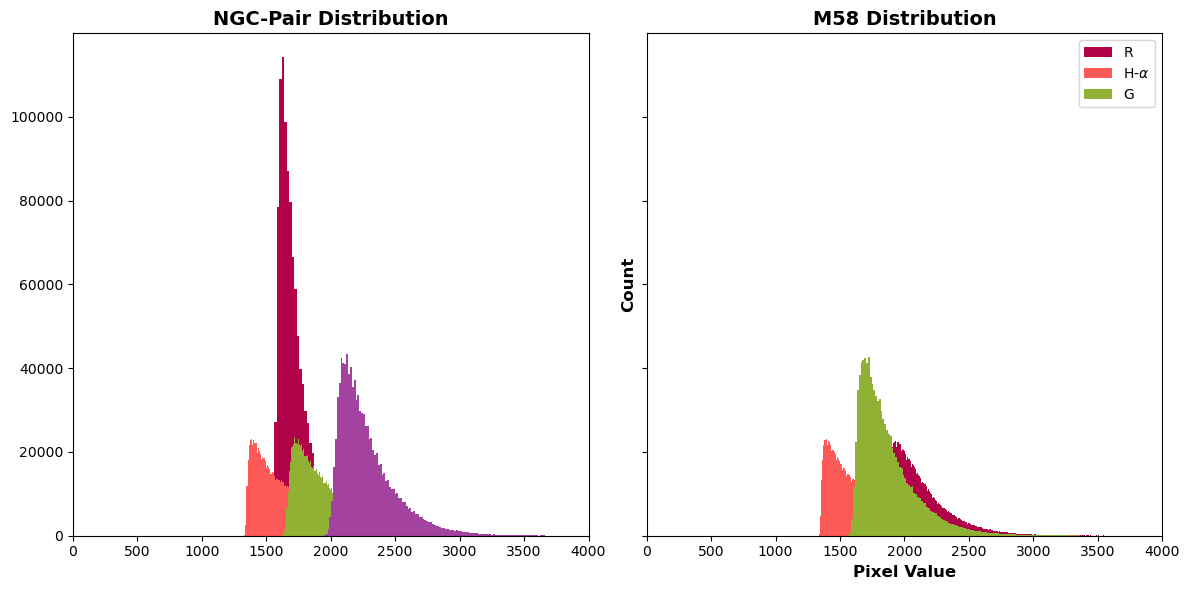

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True, sharey=True);

ax1.set_title(
    'NGC-Pair Distribution', 
              fontsize=14, fontweight='bold');
ax1.hist((unc_pair['r'].flatten()), bins=len(np.unique(unc_pair['r'].flatten()))+1, label='R', color='xkcd:raspberry');
ax1.hist((unc_pair['ha'].flatten()), bins=len(np.unique(unc_pair['ha'].flatten()))+1, label=f'H-$\\alpha$', color='xkcd:grapefruit');
ax1.hist((unc_pair['g'].flatten()), bins=len(np.unique(unc_pair['g'].flatten()))+1, label='G', color='xkcd:avocado');
ax1.hist((unc_pair['i'].flatten()), bins=len(np.unique(unc_pair['i'].flatten()))+1, label='I', color='xkcd:ugly purple');
ax1.set_xlim(0, 4000);

ax2.set_title(
    'M58 Distribution', 
              fontsize=14, fontweight='bold');
ax2.hist(unc_m58['r'].flatten(), bins=len(np.unique(unc_m58['r'].flatten()))+1, label='R', color='xkcd:raspberry');
ax2.hist(unc_m58['ha'].flatten(), bins=len(np.unique(unc_m58['ha'].flatten()))+1, label=f'H-$\\alpha$', color='xkcd:grapefruit');
ax2.hist(unc_m58['g'].flatten(), bins=len(np.unique(unc_m58['g'].flatten()))+1, label='G', color='xkcd:avocado');
ax2.set_xlim(0, 4000);

plt.xlabel('Pixel Value', fontsize=12, fontweight='bold');
plt.ylabel('Count', fontsize=12, fontweight='bold');
plt.legend();

In [4]:
m58 = {
    'g': fits.open('M 58/calibrated_g.fits')[0].data,
    'ha': fits.open('M 58/calibrated_ha.fits')[0].data,
    'r': fits.open('M 58/calibrated_r.fits')[0].data
}

m_sfr = m58['r'] - m58['ha']
m_bkg = pb.Background2D(m_sfr, box_size=(100, 100), filter_size=(3, 3), sigma_clip=SigmaClip(sigma=3),
                    mask=(m_sfr == 0), bkg_estimator=pb.MedianBackground())

m_sfr = m_sfr - m_bkg.background

In [5]:
# initialize the PhotAnnulus class for NGC 4567
ngc = phan(pair_sfr)
ngc_norm = ngc.normalizer() # defaults: interval='ZScale', stretch='Sqrt', pmin=1, pmax=99.75
ngc_snippet, ngc_sources = ngc.sources(xdim=(160, 495), ydim=(360, 695), sigma=3) # defaults: fwhm=4, threshold=5, r_in=10, r_out=20

# getting rid of bad sources & updating the source table
ngc_sources = ngc_sources[~np.isin(ngc_sources['id'], [11, 6, 1])]
ngc.revise(ngc_sources)

ngc_mags, ngc_srctable = ngc.magnitudes([5, 7]) # defaults: sigma=3.0, maxiters=10

Snippet Resolution:  335 x 335 px


In [6]:
# initialize the PhotAnnulus class for M58
m58 = phan(m_sfr)
m_norm = m58.normalizer() # defaults: interval='ZScale', stretch='Sqrt', pmin=1, pmax=99.75
m_snippet, m_sources = m58.sources(xdim=(325, 660), ydim=(360, 695), sigma=4, threshold=6) # defaults: fwhm=4, threshold=5, r_in=10, r_out=20

m_mags, m_srctable = m58.magnitudes([7]) # defaults: sigma=3.0, maxiters=10

Snippet Resolution:  335 x 335 px


In [7]:
print(f'[Magnitudes of Interacting Pair] \nNGC 4567: {ngc_mags[0][1]:.2f} \nNGC 4568: {ngc_mags[1][1]:.2f} \n')
print(f'[Magnitude of Non-Interacting Galaxy] \nM58: {m_mags[0][1]:.2f}')

[Magnitudes of Interacting Pair] 
NGC 4567: -14.20 
NGC 4568: -12.41 

[Magnitude of Non-Interacting Galaxy] 
M58: -6.39
